In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import art3d
import nibabel as nib

import sys
sys.path.insert(1, '/host/cassio/export03/data/opt/hippunfold_toolbox/hippunfold_toolbox')
import plotting
import utils

In [46]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale.  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.
    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().'''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
    return ax


In [47]:
resourcesdir = '/export03/data/opt/hippunfold_toolbox/resources'
den = '0p5mm'


# load canonical and unfolded surfaces
gii = nib.load(f'{resourcesdir}/canonical_surfs/tpl-avg_space-canonical_den-{den}_label-hipp_midthickness.surf.gii')
v = gii.get_arrays_from_intent('NIFTI_INTENT_POINTSET')[0].data
f = gii.get_arrays_from_intent('NIFTI_INTENT_TRIANGLE')[0].data
gii = nib.load(f'{resourcesdir}/canonical_surfs/tpl-avg_space-canonical_den-{den}_label-dentate_midthickness.surf.gii')
gii = nib.load(f'{resourcesdir}/canonical_surfs/tpl-avg_space-unfold_den-{den}_label-hipp_midthickness.surf.gii')
vu = gii.get_arrays_from_intent('NIFTI_INTENT_POINTSET')[0].data
gii = nib.load(f'{resourcesdir}/canonical_surfs/tpl-avg_space-unfold_den-{den}_label-dentate_midthickness.surf.gii')

# reorient unfolded
vu = vu[:,[1,0,2]]
# translate folded
translatx = np.max(vudg[:,0]) - np.min(v[:,0]) + 2
translaty = np.mean(vudg[:,1]) - np.mean(v[:,1])
v = v + [translatx, translaty, 0]

/tmp/ipykernel_43499/631568032.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  pc = art3d.Poly3DCollection(v[f], faceColor=[0, 0, 0, 0], edgeColor=[0,0,0,1])
/tmp/ipykernel_43499/631568032.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  pc = art3d.Poly3DCollection(vu[f], faceColor=[0, 0, 0, 0], edgeColor=[0,0,0,1])
/tmp/ipykernel_43499/631568032.py:17: UserWarning: Attempting to set identical bottom == top == 1.171875 results in singular transformations; automatically expanding.
  ax[1].set_zlim([np.min(vu[:,2]),np.max(vu[:,2])])


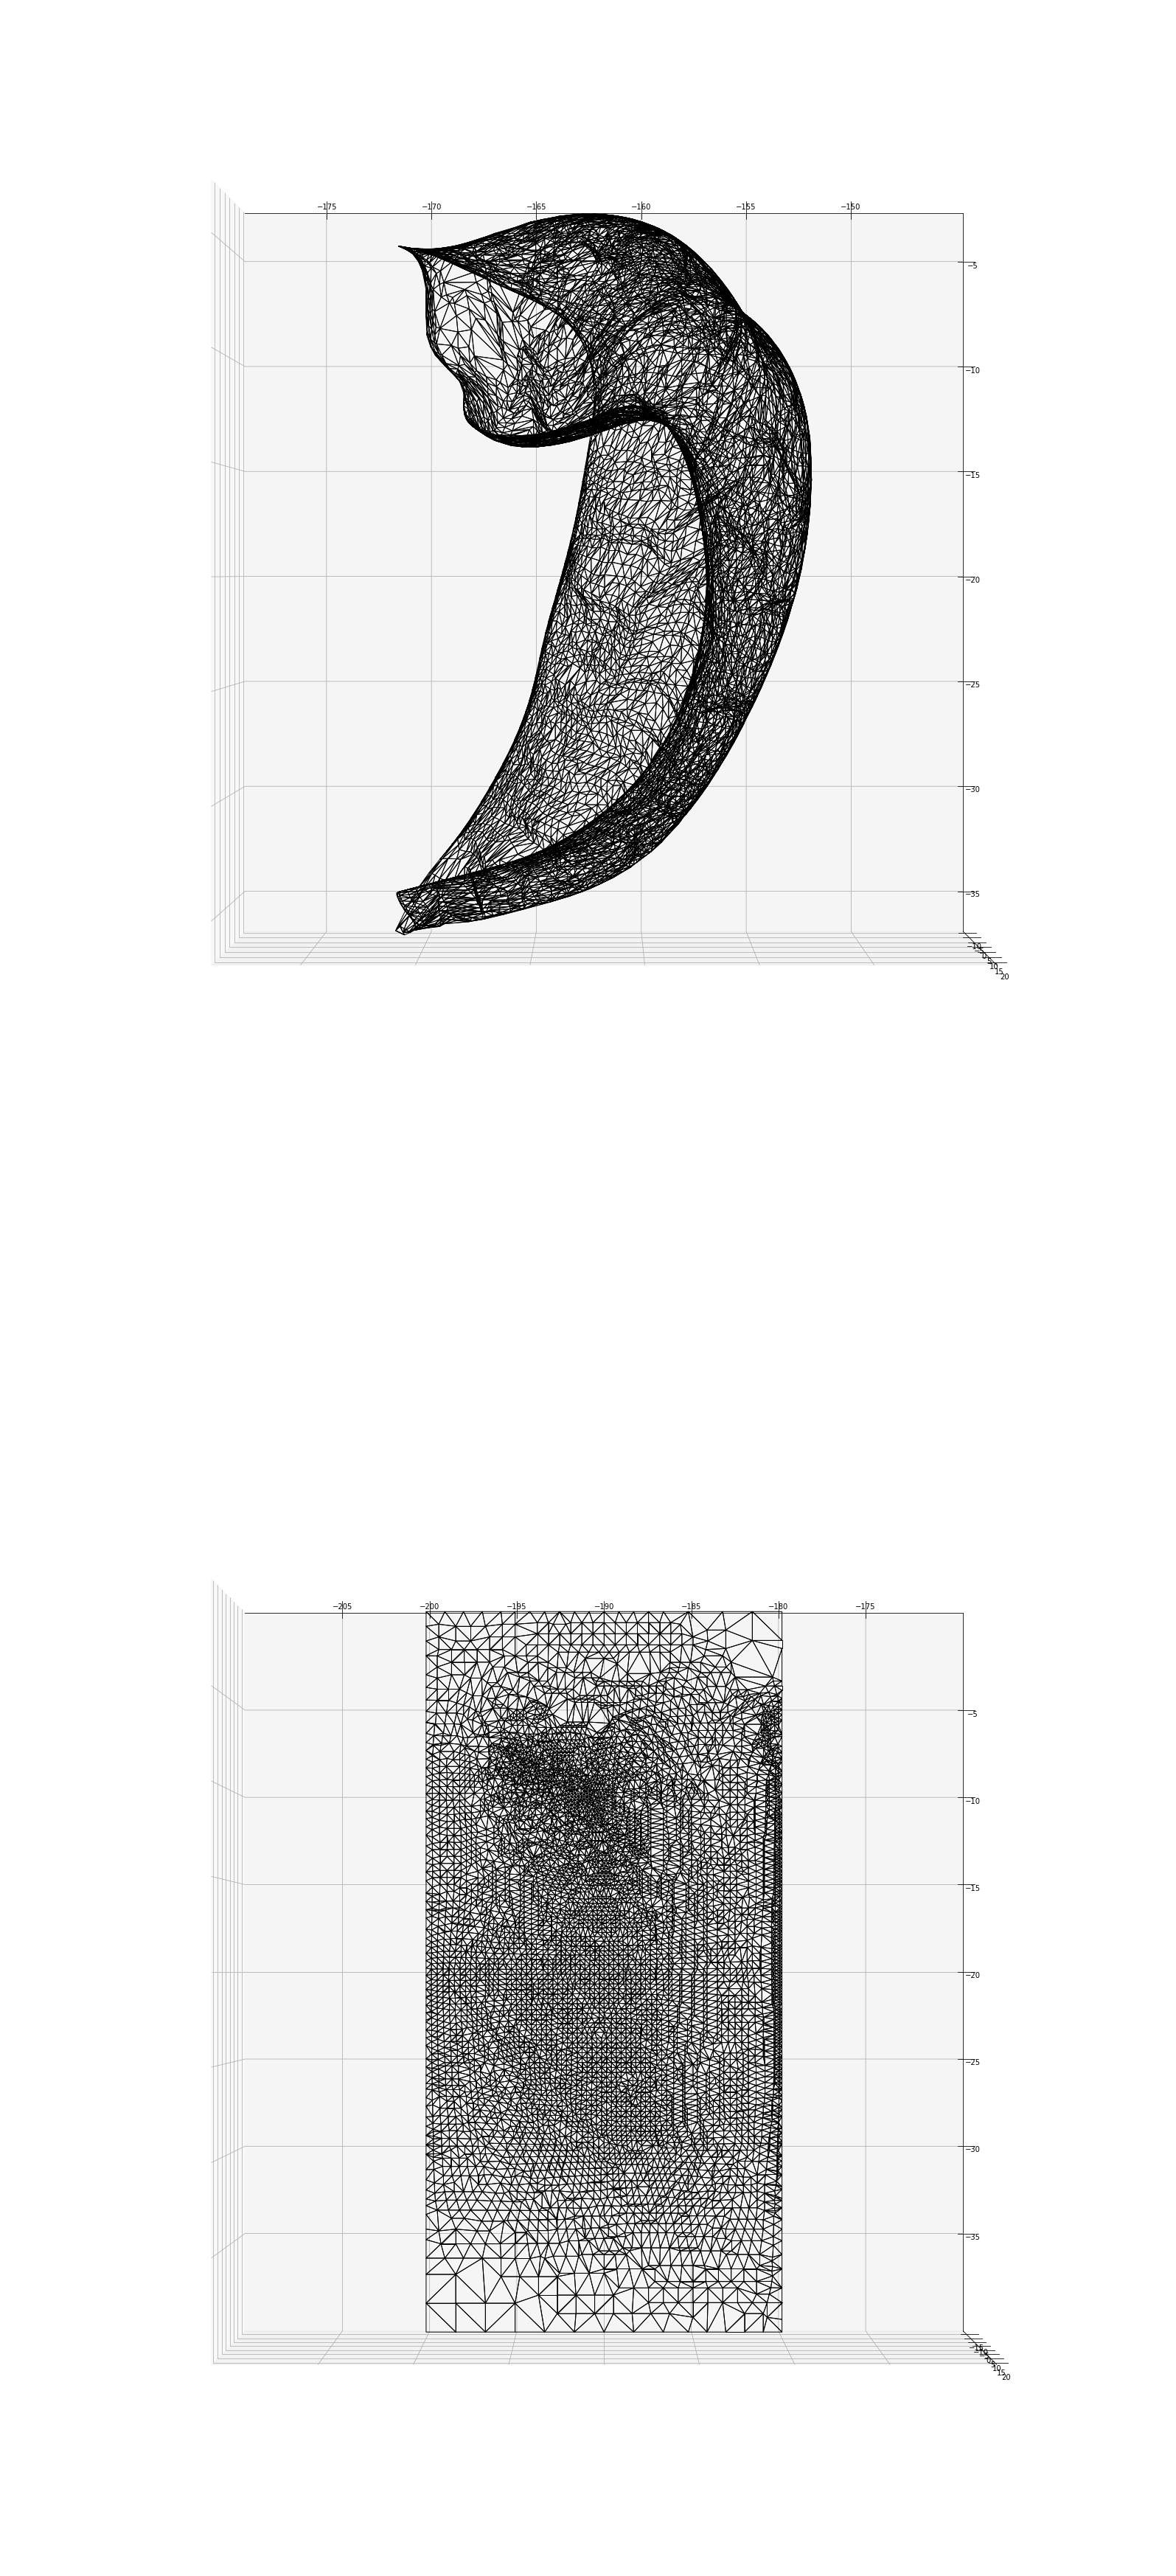

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(64,64), subplot_kw={'projection': "3d"})

pc = art3d.Poly3DCollection(v[f], faceColor=[0, 0, 0, 0], edgeColor=[0,0,0,1])
ax[0].add_collection(pc)

ax[0].set_xlim([np.min(v[:,0]),np.max(v[:,0])])
ax[0].set_ylim([np.min(v[:,1]),np.max(v[:,1])])
ax[0].set_zlim([np.min(v[:,2]),np.max(v[:,2])])
ax[0].view_init(elev=90, azim=-90)
ax[0] = set_axes_equal(ax[0])

pc = art3d.Poly3DCollection(vu[f], faceColor=[0, 0, 0, 0], edgeColor=[0,0,0,1])
ax[1].add_collection(pc)

ax[1].set_xlim([np.min(vu[:,0]),np.max(vu[:,0])])
ax[1].set_ylim([np.min(vu[:,1]),np.max(vu[:,1])])
ax[1].set_zlim([np.min(vu[:,2]),np.max(vu[:,2])])
ax[1].view_init(elev=90, azim=-90)
ax[1] = set_axes_equal(ax[1])

In [49]:
resourcesdir = '/export03/data/opt/hippunfold_toolbox/resources'
den = '2mm'


# load canonical and unfolded surfaces
gii = nib.load(f'{resourcesdir}/canonical_surfs/tpl-avg_space-canonical_den-{den}_label-hipp_midthickness.surf.gii')
v = gii.get_arrays_from_intent('NIFTI_INTENT_POINTSET')[0].data
f = gii.get_arrays_from_intent('NIFTI_INTENT_TRIANGLE')[0].data
gii = nib.load(f'{resourcesdir}/canonical_surfs/tpl-avg_space-canonical_den-{den}_label-dentate_midthickness.surf.gii')
gii = nib.load(f'{resourcesdir}/canonical_surfs/tpl-avg_space-unfold_den-{den}_label-hipp_midthickness.surf.gii')
vu = gii.get_arrays_from_intent('NIFTI_INTENT_POINTSET')[0].data
gii = nib.load(f'{resourcesdir}/canonical_surfs/tpl-avg_space-unfold_den-{den}_label-dentate_midthickness.surf.gii')

# reorient unfolded
vu = vu[:,[1,0,2]]
# translate folded
translatx = np.max(vudg[:,0]) - np.min(v[:,0]) + 2
translaty = np.mean(vudg[:,1]) - np.mean(v[:,1])
v = v + [translatx, translaty, 0]

/tmp/ipykernel_43499/631568032.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  pc = art3d.Poly3DCollection(v[f], faceColor=[0, 0, 0, 0], edgeColor=[0,0,0,1])
/tmp/ipykernel_43499/631568032.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  pc = art3d.Poly3DCollection(vu[f], faceColor=[0, 0, 0, 0], edgeColor=[0,0,0,1])
/tmp/ipykernel_43499/631568032.py:17: UserWarning: Attempting to set identical bottom == top == 1.171875 results in singular transformations; automatically expanding.
  ax[1].set_zlim([np.min(vu[:,2]),np.max(vu[:,2])])


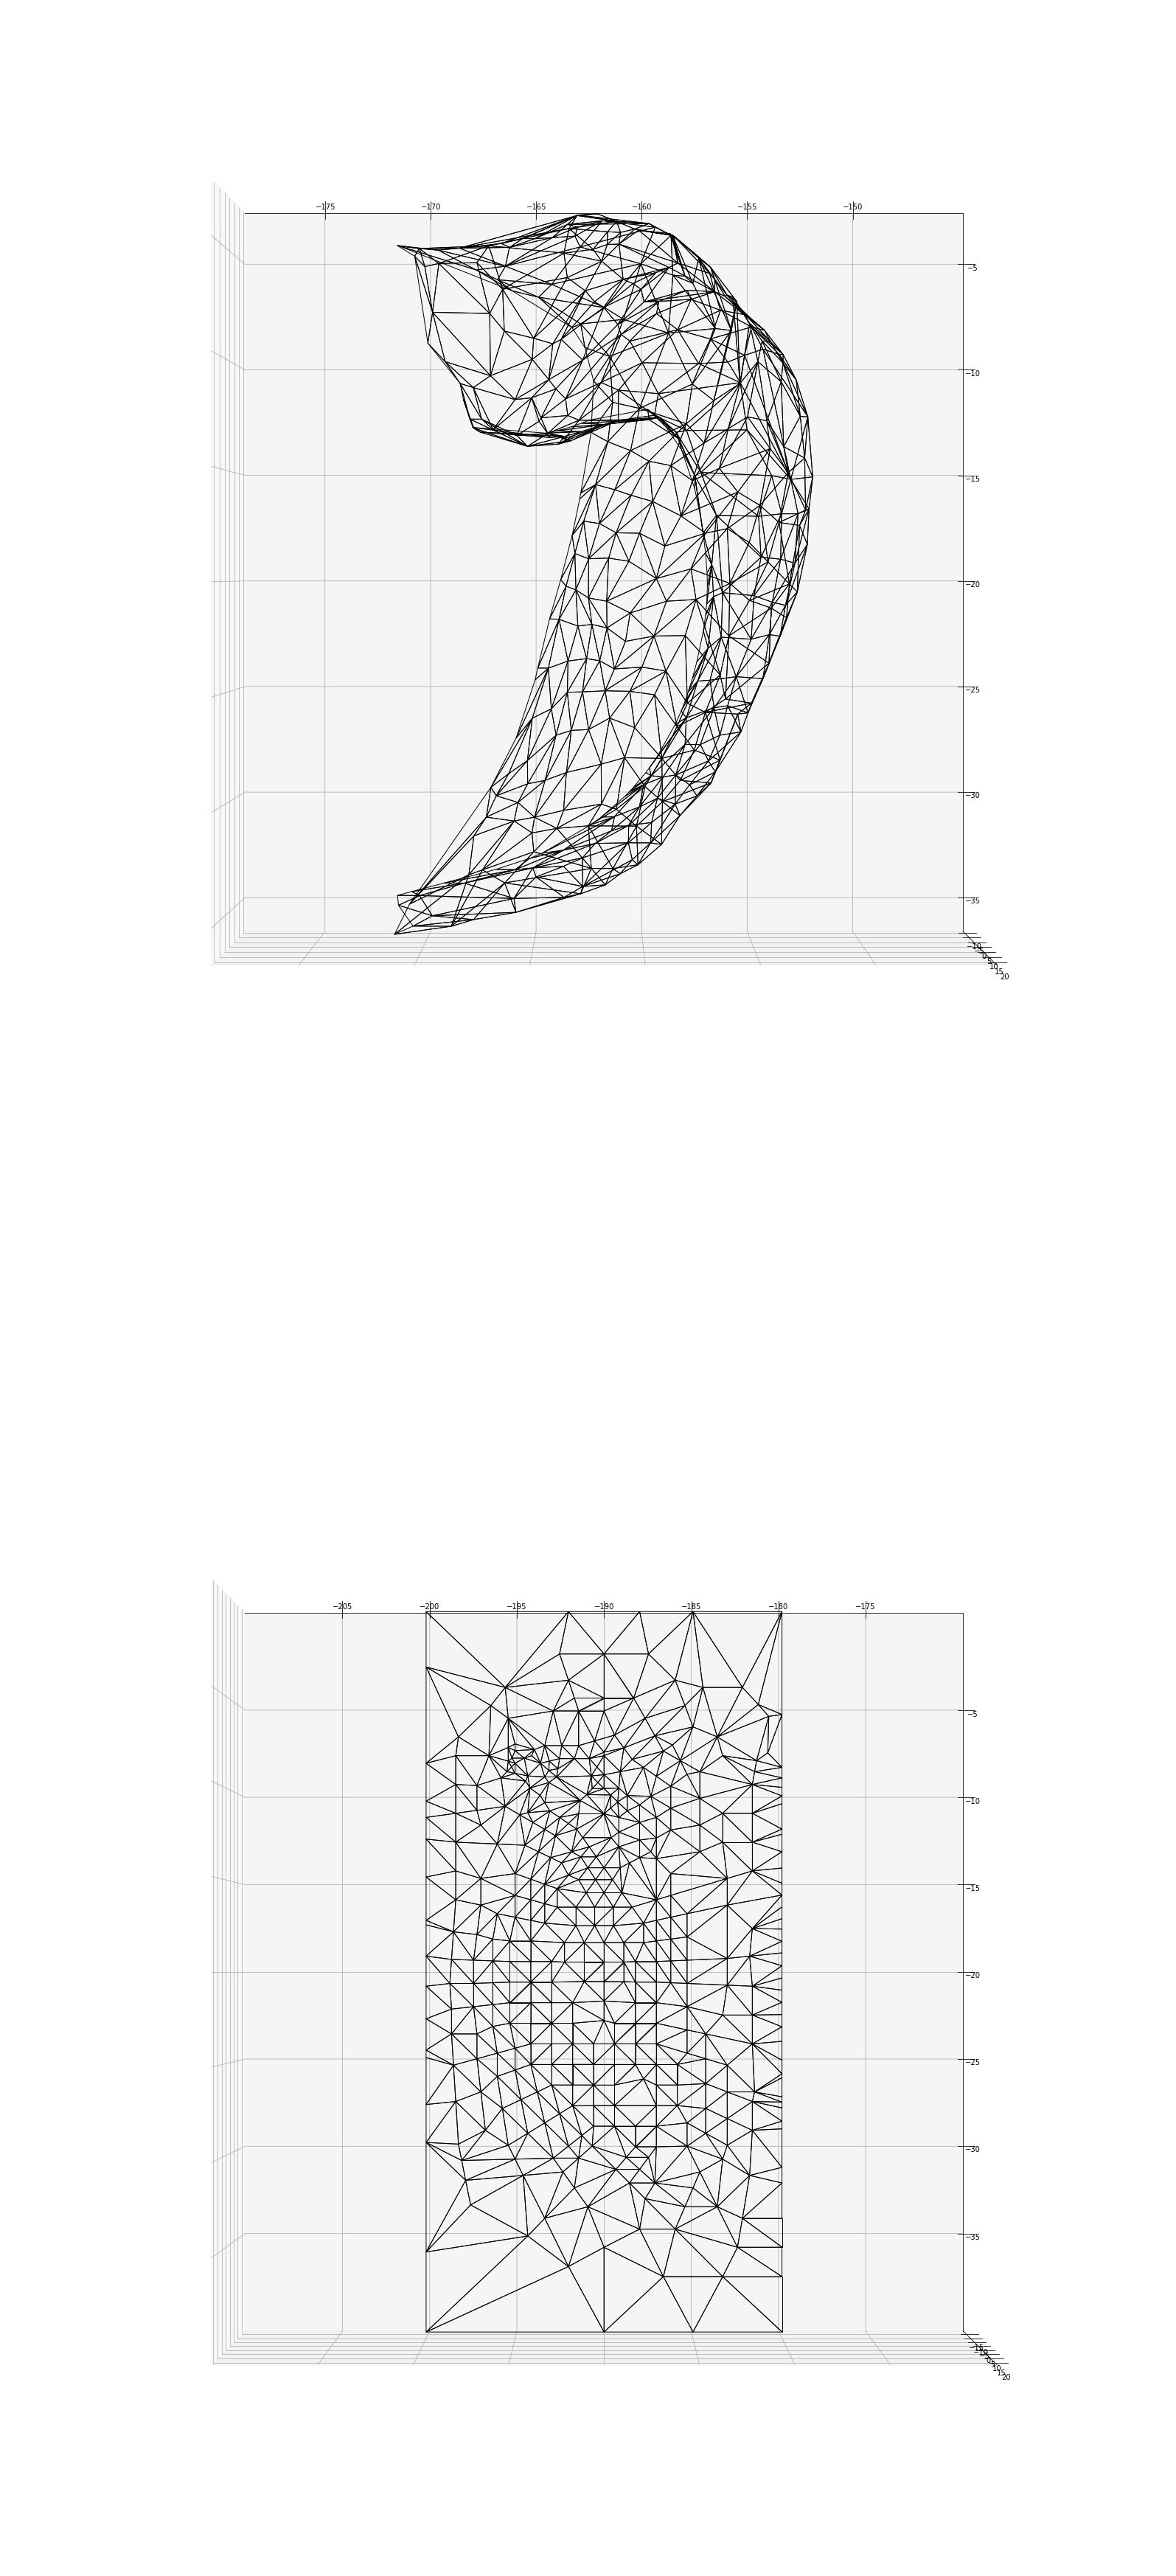

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(64,64), subplot_kw={'projection': "3d"})

pc = art3d.Poly3DCollection(v[f], faceColor=[0, 0, 0, 0], edgeColor=[0,0,0,1])
ax[0].add_collection(pc)

ax[0].set_xlim([np.min(v[:,0]),np.max(v[:,0])])
ax[0].set_ylim([np.min(v[:,1]),np.max(v[:,1])])
ax[0].set_zlim([np.min(v[:,2]),np.max(v[:,2])])
ax[0].view_init(elev=90, azim=-90)
ax[0] = set_axes_equal(ax[0])

pc = art3d.Poly3DCollection(vu[f], faceColor=[0, 0, 0, 0], edgeColor=[0,0,0,1])
ax[1].add_collection(pc)

ax[1].set_xlim([np.min(vu[:,0]),np.max(vu[:,0])])
ax[1].set_ylim([np.min(vu[:,1]),np.max(vu[:,1])])
ax[1].set_zlim([np.min(vu[:,2]),np.max(vu[:,2])])
ax[1].view_init(elev=90, azim=-90)
ax[1] = set_axes_equal(ax[1])

In [51]:
resourcesdir = '/export03/data/opt/hippunfold_toolbox/resources'
den = 'unfoldiso'


# load canonical and unfolded surfaces
gii = nib.load(f'{resourcesdir}/canonical_surfs/tpl-avg_space-canonical_den-{den}_label-hipp_midthickness.surf.gii')
v = gii.get_arrays_from_intent('NIFTI_INTENT_POINTSET')[0].data
f = gii.get_arrays_from_intent('NIFTI_INTENT_TRIANGLE')[0].data
gii = nib.load(f'{resourcesdir}/canonical_surfs/tpl-avg_space-canonical_den-{den}_label-dentate_midthickness.surf.gii')
gii = nib.load(f'{resourcesdir}/canonical_surfs/tpl-avg_space-unfold_den-{den}_label-hipp_midthickness.surf.gii')
vu = gii.get_arrays_from_intent('NIFTI_INTENT_POINTSET')[0].data
gii = nib.load(f'{resourcesdir}/canonical_surfs/tpl-avg_space-unfold_den-{den}_label-dentate_midthickness.surf.gii')

# reorient unfolded
vu = vu[:,[1,0,2]]
# translate folded
translatx = np.max(vudg[:,0]) - np.min(v[:,0]) + 2
translaty = np.mean(vudg[:,1]) - np.mean(v[:,1])
v = v + [translatx, translaty, 0]

/tmp/ipykernel_43499/631568032.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  pc = art3d.Poly3DCollection(v[f], faceColor=[0, 0, 0, 0], edgeColor=[0,0,0,1])
/tmp/ipykernel_43499/631568032.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  pc = art3d.Poly3DCollection(vu[f], faceColor=[0, 0, 0, 0], edgeColor=[0,0,0,1])
/tmp/ipykernel_43499/631568032.py:17: UserWarning: Attempting to set identical bottom == top == 1.171875 results in singular transformations; automatically expanding.
  ax[1].set_zlim([np.min(vu[:,2]),np.max(vu[:,2])])


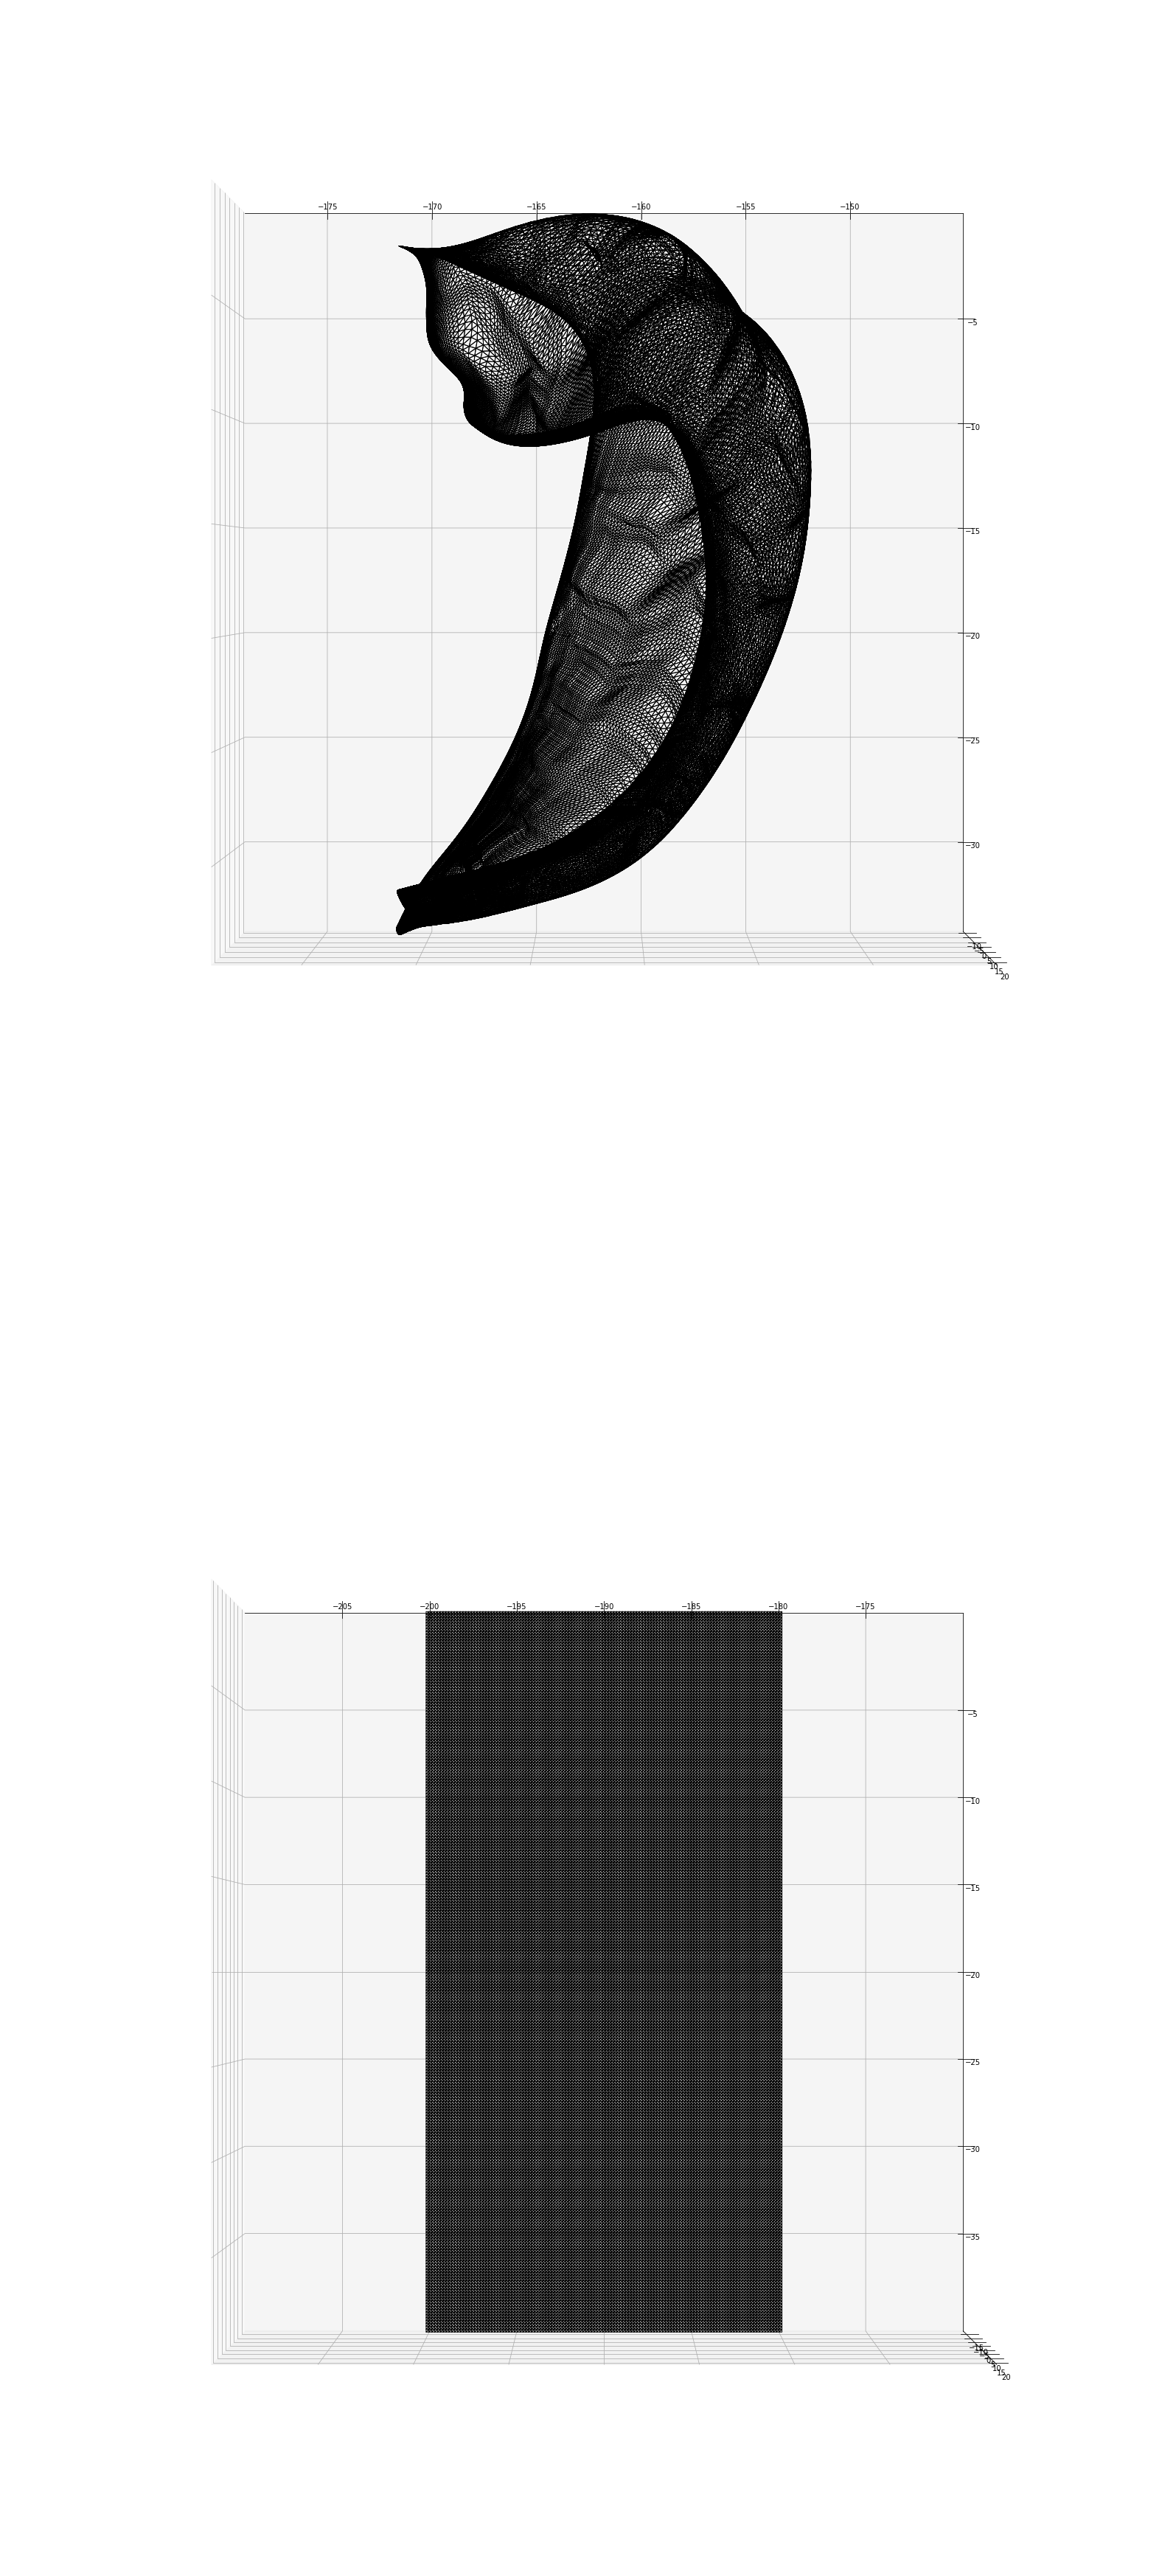

In [52]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(64,64), subplot_kw={'projection': "3d"})

pc = art3d.Poly3DCollection(v[f], faceColor=[0, 0, 0, 0], edgeColor=[0,0,0,1])
ax[0].add_collection(pc)

ax[0].set_xlim([np.min(v[:,0]),np.max(v[:,0])])
ax[0].set_ylim([np.min(v[:,1]),np.max(v[:,1])])
ax[0].set_zlim([np.min(v[:,2]),np.max(v[:,2])])
ax[0].view_init(elev=90, azim=-90)
ax[0] = set_axes_equal(ax[0])

pc = art3d.Poly3DCollection(vu[f], faceColor=[0, 0, 0, 0], edgeColor=[0,0,0,1])
ax[1].add_collection(pc)

ax[1].set_xlim([np.min(vu[:,0]),np.max(vu[:,0])])
ax[1].set_ylim([np.min(vu[:,1]),np.max(vu[:,1])])
ax[1].set_zlim([np.min(vu[:,2]),np.max(vu[:,2])])
ax[1].view_init(elev=90, azim=-90)
ax[1] = set_axes_equal(ax[1])